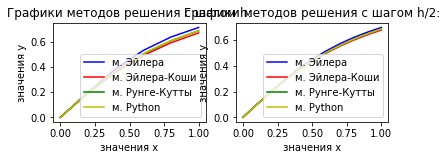

In [1]:
import numpy as np
import decimal
from math import *
import matplotlib.pyplot as plt 
from scipy. integrate import odeint
#from google.colab import files

# Ниже перечислены НУ, изменяя которые можно влиять на ход решения.

u="cos(x+y)+3/2(x-y)" #- уравнение которое будем решать
#Представим его ввиде функции
def dydx(y,x):
    return cos(x+y)+3/2*(x-y)

a_input = 0 # левая граница 
b_input = 1 # правая граница
i_n_znach_input = 0 # индекс начального значения (должен совпадать с левой границей)
n_znach_input = 0 # начальное значение
h = .2 # шаг решения
q = 256 # для м.Python точность построения графика (количество точек на еденичном интервале [a,b]) (пример: a=1,b=4,q=16-> будет простроено (4-1)*16 = 48 точек, по 16 на каждую область [1x1])




#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
sh = 1/h # множитель целочисленного показателя шага
#так как python не может работать со списками с плавающей запятой, зададим функцию ограничения точности вручную
def float_range(start, stop, step): 
      while start < stop:
        yield float(start)
        start += decimal.Decimal(step)

y=[] # создаем пустой список (массив) под метод Эйлера
y.insert(i_n_znach_input, n_znach_input)#присваеваем НУ
y_koshi=[] # создаем пустой список (массив) под метод Эйлера-Коши
y_koshi.insert(i_n_znach_input, n_znach_input)#присваеваем НУ
y_r=[] # создаем пустой список (массив) под метод Рунге-Кутты
y_r.insert(i_n_znach_input, n_znach_input)#присваеваем НУ
x = np.arange(a_input,b_input+h,h)#создаем список (массив) со всеми x координатами точек

#создаем пустой график с подписанными осями
fig = plt.figure()
ax_1 = fig.add_subplot(2, 2, 1)
plt.title('Графики методов решения с шагом h:')
plt.xlabel('значения x')
plt.ylabel('значения y')

#считаем значения функции Методом Эйлера, следом сразу выводим значение Эйлера-Коши, после применяем метод Рунге-Кутты
for i in float_range(a_input,b_input,h): 
    k=int(i*sh)
    #метод Эйлера
    y.insert(k+1, y[k]+h*dydx(y[k],x[k]))
    #метод Эйлера-Коши
    y_koshi.insert(k+1, y_koshi[k]+h*((dydx(y_koshi[k],x[k])+(dydx(y[k+1],x[k+1])))/2)) 
    #метод Рунге-Кутты
    k1=dydx(y_r[k],x[k])
    k2=dydx(y_r[k]+h/2*k1,(x[k]+h/2))
    k3=dydx(y_r[k]+h/2*k2,(x[k]+h/2))
    k4=dydx(y_r[k]+h*k3,x[k]+h)
    y_r.insert(k+1, y_r[k]+h/6*(k1+2*k2+2*k3+k4))
#выводим значения полученные методом Эйлера синей чертой
plt.plot(x,y,'b') 
#выводим значения полученные методом Эйлера-Коши красной чертой
plt.plot(x,y_koshi,'r') 
#выводим значения полученные методом Рунге-Кутты зеленой чертой
plt.plot(x,y_r,'g')
    
# Выполним небольшую проверку и построим график заданной функции с помощью библиотек python напрямую
x0 = np.linspace( a_input, b_input, (b_input-a_input)*q)
y0 = n_znach_input # начальное значение
y_p = odeint(dydx, y0, x0) # решение ДУ
y_p = np.array(y_p).flatten() 
plt.plot( x0, y_p,'y') # построение графика желтого цвета

#Добавим легенду для полученных графиков
plt.legend(['м. Эйлера','м. Эйлера-Коши','м. Рунге-Кутты','м. Python'])

#проделаем все тоже самое с шагом h/2:
ax_2 = fig.add_subplot(2, 2, 2)
half = h/2
yh=[0] # создаем пустой список (массив) под метод Эйлера
yh_koshi=[0] # создаем пустой список (массив) под метод Эйлера-Коши
yh_r=[0] # создаем пустой список (массив) под метод Рунге-Кутты
xh = np.arange(a_input,b_input+half,half)#создаем список (массив) со всеми x координатами точек
plt.title('Графики методов решения с шагом h/2:')
plt.xlabel('значения x')
plt.ylabel('значения y')
for i in float_range(a_input,b_input,half): 
    k=int(i*sh*2)
    #метод Эйлера
    yh.insert(k+1, yh[k]+half*dydx(yh[k],xh[k]))
    #метод Эйлера-Коши
    yh_koshi.insert(k+1, yh_koshi[k]+half*((dydx(yh_koshi[k],xh[k])+(dydx(yh[k+1],xh[k+1])))/2))
    #метод Рунге-Кутты
    k1=dydx(yh_r[k],xh[k])
    k2=dydx(yh_r[k]+half/2*k1,(xh[k]+half/2))
    k3=dydx(yh_r[k]+half/2*k2,(xh[k]+half/2))
    k4=dydx(yh_r[k]+half*k3,xh[k]+half)
    yh_r.insert(k+1, yh_r[k]+half/6*(k1+2*k2+2*k3+k4))
plt.plot(xh,yh,'b') 
plt.plot(xh,yh_koshi,'r') 
plt.plot(xh,yh_r,'g')
plt.plot( x0, y_p,'y') # построение графика желтого цвета
plt.legend(['м. Эйлера','м. Эйлера-Коши','м. Рунге-Кутты','м. Python'])

#Создаем пустые списки (массивы) для погрешностей
e_e = []
e_k = []
e_r = []
#расчет погрешностей
for i in range(len(x)):
    e_e.append(abs(yh[i*2]-y[i]))
    e_k.append(abs(yh_koshi[i*2]-y_koshi[i])/3)
    e_r.append(abs(yh_r[i*2]-y_r[i])/15)

#создаем txt файл othet.txt и записываем все полученные данные
txtf = open("othet.txt", "w+")
#создаем заголовок и выводим используемые формулы
txtf.write("Отчет по решению ОДУ с помощью методов: Эйлера, Эйлера-Коши, Рунге-Кутты"+'\n')
txtf.write("Метод Эйлера:".ljust(17)+"y[i+1]=y[i]+h*f(t[i],y[i])"+'\n')
txtf.write("Метод Эйлера-Коши:".ljust(17)+"y[i+1]=y[i]+h/2*(f(t[i],y[i])+f(t[i+1],y[i+1]))"+'\n')
txtf.write("Метод Рунге-Кутты:".ljust(17)+"y[i+1]=y[i]+h/6*(k1[i]+2k2[i]+2k3[i]+k4[i]))"+'\n')
txtf.write("где,"+'\n'+"k1[i]=f(t[i],y[i])"+'\n'+"k2[i]=f(t[i]+h/2,y[i]+h/2*k1[i])"+'\n'+"k3[i]=f(t[i]+h/2,y[i]+h/2*k3[i])"+'\n'+"k4[i]=f(t[i]+h,y[i]+h*k3[i])"+'\n')
txtf.write("Погрешность м.Эйлера:".ljust(26)+"E[i]]=abs|y(от h/2)[i]-y(от h)[i]|"+'\n')
txtf.write("Погрешность м.Эйлера-Коши:".ljust(26)+"E[i]]=abs|y(от h/2)[i]-y(от h)[i]|/3"+'\n')
txtf.write("Погрешность м.Рунге-Кутты:".ljust(26)+"E[i]]=abs|y(от h/2)[i]-y(от h)[i]|/15"+'\n')
txtf.write("Погрешности считаем по правилу Рунге, общая формулировка которого:"+'\n')
txtf.write("abs|y(от h/2)[i]-y(от h)[i]|<=(abs|y(от h/2)[i]-y(от h)[i]|)/(2**p-1)<=E"+'\n')
txtf.write("где: abs() - модуль, ** - возведение в степень, p - порядок точности (p=1 для м.Эйлера, p=2 для м.Эйлера-Коши, p=4 для м.Рунге-Кутты)"+'\n')
#Вывод всех НУ
txtf.write('\n'+"Решение ДУ:".ljust(14)+"y'="+u.ljust(14)+'\n'+"На интервале:".ljust(14)+"["+str(a_input)+","+str(b_input)+"]"+'\n'+"С шагом:".ljust(14)+"h="+str(h)+'\n'+"Полушагом:".ljust(14)+"h/2="+str(half)+'\n'+"НУ:".ljust(14)+"y("+str(i_n_znach_input)+")="+str(n_znach_input)+'\n'+'\n')
#Выводим полученные решения с интервалом h 
txtf.write("Таблица полученных значений с шагом h"+'\n')
txtf.write("t(x)".ljust(26)+" |"+"y эйлера".ljust(26)+" |"+"y коши".ljust(26)+" |"+"y рунге".ljust(26)+'\n')
for i in range(len(x)):
    txtf.write(str(x[i]).ljust(26)+" |"+str(y[i]).ljust(26)+" |"+str(y_koshi[i]).ljust(26)+" |"+str(y_r[i]).ljust(26)+'\n')
#Выводим решения с шагом h/2
txtf.write("Таблица полученных значений с шагом h/2"+'\n')
txtf.write('\n'+"t(x) (h/2)".ljust(26)+" |"+"y эйлера (h/2)".ljust(26)+" |"+"y коши (h/2)".ljust(26)+" |"+"y рунге (h/2)".ljust(26)+'\n')
for i in range(len(xh)):
    if (i % 2)!=0:
        continue
    txtf.write(str(xh[i]).ljust(26)+" |"+str(yh[i]).ljust(26)+" |"+str(yh_koshi[i]).ljust(26)+" |"+str(yh_r[i]).ljust(26)+'\n')
#Выводим погрешности по правилу Рунге
txtf.write('\n'+'\n'+"Оценим погрешность по правилу Рунге:")
txtf.write('\n'+"Погрешность м. Эйлера".ljust(26)+" |"+"Погрешность м. Эйлера-Коши".ljust(26)+" |"+"Погрешность м. Рунге-Кутты".ljust(26)+'\n')
for i in range(len(x)):
    txtf.write(str(e_e[i]).ljust(26)+" |"+str(e_k[i]).ljust(26)+" |"+str(e_r[i]).ljust(26)+'\n')
txtf.write('\n'+"Максимальная (абсолютная) погрешность метода Эйлера:".ljust(60)+"E(Э)="+str(max(e_e))+'\n'+"Максимальная (абсолютная) погрешность метода Эйлера-Коши:".ljust(60)+"E(К)="+str(max(e_k))+'\n'+"Максимальная (абсолютная) погрешность метода Рунго-Кутты:".ljust(60)+"E(Р)="+str(max(e_r))+'\n')
#Выводим вывод
txtf.write('\n'+"Попробуем получить наглядное представление распределения точности 3х методов:")
txtf.write('\n'+"На одну итерацию м.Эйлера приходится: 2 итерации м.Эйлера-Коши, 5 итераций м.Рунге-Кутты")
txtf.write('\n'+"Поделив максимальное значение погрешности на количество итераций получим погрешность на итерацию:")
txtf.write('\n'+str(max(e_e)).ljust(22)+" для м.Эйлера")
txtf.write('\n'+str(max(e_k)/2).ljust(22)+" для м.Эйлера-Коши")
txtf.write('\n'+str(max(e_r)/5).ljust(22)+" для м.Рунге-Кутты")
txtf.write('\n'+"Сравнивая отношение погрешностей на итерацию, приходим к условному выводу:")
txtf.write('\n'+"м.Эйлера-Коши в "+str(max(e_e)/(max(e_k)/2)).ljust(20)+"раз точнее метода Эйлера (вычисления: Е(Э)/(Е(К)/2))")
txtf.write('\n'+"м.Рунде-Кутты в "+str((max(e_k)/2)/(max(e_r)/5)).ljust(20)+"раз точнее метода Эйлера-Коши (вычисления: (Е(К)/2)/(Е(Р)/5))")
txtf.write('\n'+"м.Рунде-Кутты в "+str(max(e_e)/(max(e_r)/5)).ljust(20)+"раз точнее метода Эйлера (вычисления: Е(Э)/(Е(Р)/5))")
txtf.write('\n'+"Сравнение выполняется сравнением по порешностей на одну итерацию,")
txtf.write('\n'+"например: метод Эйлера выполняется за 1 итерацию, а Эйлера-Коши за 2, в итоге имеем формулу Е(Э)/(Е(К)/2))")
txtf.write('\n'+'\n'+"Вывод:")
txtf.write('\n'+"Сравнивая значения погрешностей вычислений из таблиц результатов, делаем вывод о том,")
txtf.write('\n'+"что более точными являются вычисления по методу Рунге-Кутты четвертого порядка точности.")
txtf.write('\n'+"Повысить точность методов можно, уменьшая шаг интегрирования h.")
txtf.write('\n'+"Распределение точности от наименее точного м.Эйлера->м.Эйлера-Коши->м.Рунге-Кутты"+'\n')
#полный вывод решений с шагом h/2
txtf.write('\n')
txtf.write("Полный вывод решений с шагом h/2")
txtf.write('\n'+"t(x) (h/2)".ljust(26)+" |"+"y эйлера (h/2)".ljust(26)+" |"+"y коши (h/2)".ljust(26)+" |"+"y рунге (h/2)".ljust(26)+'\n')
for i in range(len(xh)):
    txtf.write(str(xh[i]).ljust(26)+" |"+str(yh[i]).ljust(26)+" |"+str(yh_koshi[i]).ljust(26)+" |"+str(yh_r[i]).ljust(26)+'\n')
txtf.close()
plt.show()
# сохраняем полученные графики
fig.savefig('othet_graph.png', dpi=100)
#files.download('othet.txt')

# Новый раздел